# Step-by-step walkthrough of building a convolutional network (CNN)

In this assignment, we will implement:
 - convolutional (`conv`) and pooling (`pool`) layers via `numpy` 
 -  forward propogation and backward propogation.

**Notation**:
- Superscript $[l]$ denotes $l^{th}$ layer. 
    - Example: $a^{[4]}$ means the $4^{th}$ layer activation. $W^{[5]}$ and $b^{[5]}$ are the parameters of the $5^{th}$ layer.


- Superscript $(i)$ denotes the index of a data example: $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training sample.
    
    
- Lowerscript $i$ denotes the $i^{th}$ entry in a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the activations in  $l^{th}$ fully connected layer.
    
    
- $n_H$, $n_W$ and $n_C$ denotes the height, width and number of channels of a layer, respectively. If you ever want to reference a specific layer $l$, you can write it as: $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$. 
- $n_{H_{prev}}$, $n_{W_{prev}}$ and $n_{C_{prev}}$ denote the height, width and number of channels of the previous layer, respectively. For example, for the layer $l$, those values would be denoted as: $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$. 

Given PA1 and PA2, we assume you're familiar with `numpy`. Let's get started.

---
## 1 - Packages

You will need to import the following packages in this assignment: 
- [`numpy`](www.numpy.org),
- [`matplotlib`](http://matplotlib.org),
- `np.random.seed(1)` is also used to keep all the random function calls consistent to grade your work.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

---
## 2 - Outline of the Assignment

You'll be building the core components of a convolutional neural network. Follow the particular instructions given in each exercise.

- Convolution functions, including:
    - Zero-padding
    - Convolution operation (Convolve window)
    - Forward convolution 
    - Backward convolution
- Pooling functions, including:
    - Pooling forward
    - Create mask 
    - Distribute value
    - Pooling backward
    
For Part 1, you'll implement these functions from scratch, using `numpy`. In Part 2, you'll use the TensorFlow equivalents of these functions to build Convolutional neural network.

<div class="alert alert-warning">
    <p><strong>Note:</strong> as with neural networks – for every forward function, there is a corresponding backward computation. Because of this, you'll be storing parameters in a cache. During backpropagation, these cached parameters will be used to compute gradients.</p>
</div>

---
## 3 - Convolutional Neural Networks

Most deep learning frameworks make convolutions quite easy to use; however, they remain one of the important concepts to understand in Deep Learning. A `conv` layer transforms an input volume into an output volume possibly of a  different size, as we covered in the lecture.

In Part 1, you'll build steps of the `conv` layer. First, you'll implement two helper functions:
1. `zero_pad`, for zero padding
1. `conv_single_step` to compute the actual convolution

### 3.1 - Zero-Padding

Zero-padding adds zeros around the border of an image.

The primary benefits of padding operation are:
- it allows a `conv` layer to avoid shrinking the height and width of an input volume.
  - An important special case of padding is the "same" keyword, where the height/width of the output volume remains the same as the input volume.
- it allows a filter (of size greater than 1x1) to be applied on the edge pixels of an image. 

<div class="alert alert-info"><h1>Exercise 1</h1>
    <p> Implement the following function (<code>zero_pad</code>), which pads all the images of a batch of examples X with zeros.</p>
</div>

Use [`np.pad`][np.pad]. For example, if you want to pad the array $a$ of shape $(5,5,5,5,5)$ with `pad = 1` for the 2nd dimension, `pad = 3` for the 4th dimension and `pad = 0` for the rest, you would use the following:
```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), 'constant', constant_values = (..,..))
```

[np.pad]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html

In [2]:
# GRADED FUNCTION: zero_pad

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (~1 line)
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = (0))
    ### END CODE HERE ###
    
    return X_pad

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1, 1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1, 1] = [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


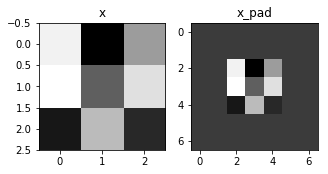

In [3]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print("x.shape =", x.shape)
print("x_pad.shape =", x_pad.shape)
print("x[1, 1] =", x[1,1])
print("x_pad[1, 1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

**Expected Output**:


```python
x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1, 1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1, 1] = [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

### 3.2 - Single step of convolution 

Here, you'll implement the basic convolution operation as a function. You will implement that by applying a filter to a single position of the input – then you will use that function to build a convolutional unit, which:
- Takes an input volume 
- Applies a filter at every position of the input
- Outputs another volume (usually of different size)

In the first step of the following exercise, you'll implement only the unit convolution operation
- this corresponds to applying a filter to just one position and returns a real-valued (scalar) output.

Later on, you'll apply this function to multiple positions to create a full convolutional layer.

<div class="alert alert-info"><h1>Exercise 2</h1>
    <p>Implement <code>conv_single_step</code>. Hint: <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html"><code>np.sum</code></a></p>
</div>

In [4]:
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    # Element-wise product between a_slice and W. Do not add the bias yet.
    s = np.multiply(a_slice_prev,W)
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z+float(b)
    ### END CODE HERE ###

    return Z

In [5]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.99908945068


**Expected Output**:
```python
Z = -6.99908945068
```

### 3.3 - Convolutional Neural Networks - Forward computation


In the forward computation, you'll take multiple filters and convolve each of them on the input. Convolution with each of those multiple filters will give you a `2D` matrix output; you'll then stack these to have a `3D` output volume.

<div class="alert alert-info"><h1>Exercise 3</h1>
    <p>Implement the function below to convolte the filter `W` on an input activation `A_prev`.</p>
</div>

This function takes:
- `A_prev` – the activations output by the previous layer (for a batch of `m` inputs). 
- `F` – filter weights denoted by `W`
- `b` – bias vector, where each filter `F` has its own bias (just a single value for each)
You'll also have access to a dictionary `dict` of hyperparameters which contains the `stride` and `padding` values.

**Hint**: 
1. To select a 3x3 slice of the upper left corner of `A_prev` (shape: (5, 5, 3)), you would:
```python
start = 0 # this is the upper-left corner of where you want to start
end = 3 # this should be 'start + N'
a_slice_prev = A_prev[start:end, start:end, :]
```
This will be useful for defining `a_slice_prev` below.
2. You can define `a_slice` with its corners: `vertical_start`, `vertical_end`, `horiz_start` and `horiz_end`. 

**Remember**:
The formulas to compute the output shape of the convolution is:
$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters}$$

In this exercise, vectorization **is not** necesssary since in the future you will use optimized convolution operations that comes with the standard frameworks (such as tensorflow). We will implement everything with `for`-loops below.

In [10]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor. (≈2 lines)
    n_H = int((n_H_prev - f + (2 * pad)) / (stride)) + 1
    n_W = int((n_W_prev - f + (2 * pad)) / (stride)) + 1
    
    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                                 # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]                     # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    # Find the corners of the current "slice" (≈4 lines)
                    vertical_start = h * stride
                    vertical_end = vertical_start + f
                    horizontal_start = w * stride
                    horizontal_end = horizontal_start + f
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vertical_start:vertical_end, horizontal_start:horizontal_end, :]
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[...,c], b[...,c])
                                        
    ### END CODE HERE ###

    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [11]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Zs mean =", np.mean(Z))
print("Z[3, 2, 1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Zs mean = 0.0489952035289
Z[3, 2, 1] = [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


**Expected Output**:
```python
Zs mean = 0.0489952035289
Z[3, 2, 1] = [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]
```

Reminder: The `conv` layer should also contain an activation function. You can use the following template to implement that.
```python
# Convolve the window to get back one output neuron
Z[i, h, w, c] = ... 
# Apply activation
A[i, h, w, c] = activation(Z[i, h, w, c])
```

**NOTE:** You don't actually need to implement that here.

---
## 4 - Pooling layer 

The pooling (`pool`) layer reduces the dimensions along the height and width.
1. that helps to reduce computation
2. that helps to make feature detectors more invariant to position of input (adds some robustness)

Two most common types of `pool` layers:
1. `max-pool` (max-pooling layer): slides an ($f, f$) window over the input and stores the max value of the window in the output. (Can also be thought of as `max(x1, x2, ..., xn)`, where `x1, x2, ..., xn` is just flattened matrix.)
1. `avg-pool` (average-pooling) layer: slides an ($f, f$) window over the input and stores the average value of the window in the output. (Can also be thought of as `avg(x1, x2, ..., xn)`, where `x1, x2, ..., xn` is just flattened matrix.)

Unlike `conv` operation, `pool` layers have **no** parameters to train/update (using backpropagation). However, `pool` does have hyperparemeters relating to window size $f$; this specifies the height and width of the $f \times f$ window over which the `max`or`avg` is computed.

### 4.1 - Forward Pooling
Below, you will implement `max-pool` and `avg-pool`, in the same function. 

<div class="alert alert-info"><h1>Exercise 4</h1>
    <p> Implement the forward pass of the pooling layer. See below reminder.</p>
</div>

**Reminder**:
As there's no padding, the formulas binding the output shape of the pooling to the input shape is:
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$

In [12]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / (stride))
    n_W = int(1 + (n_W_prev - f) / (stride))
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    ### START CODE HERE ###
    for i in range(m):                           # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vertical_start = h * stride
                    vertical_end = vertical_start + f
                    horizontal_start = w * stride
                    horizontal_end = horizontal_start + f
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vertical_start:vertical_end, horizontal_start:horizontal_end, c]
                    
                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    ### END CODE HERE ###
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [13]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[ 1.74481176  0.86540763  1.13376944]]]


 [[[ 1.13162939  1.51981682  2.18557541]]]]

mode = average
A = [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]


**Expected Output:**
```python
mode = max
A = [[[[ 1.74481176  0.86540763  1.13376944]]]
[[[ 1.13162939  1.51981682  2.18557541]]]]

mode = average
A = [[[[ 0.02105773 -0.20328806 -0.40389855]]]
[[[-0.22154621  0.51716526  0.48155844]]]]
```

<div class="alert alert-success">Nicely done! At this point, you've already implemented the forward pass layers of a convolutional network.</div> 

---
## 5 - Backpropagation in convolutional neural networks

In the most common deep learning frameworks (PyTorch, TensorFlow, Theano, Torch, etc.), it's uncommon that you'll need to implement the backward pass; however, it's crucial you understand how this works as it will enable you to develop a more holistic understanding of how neural networks work. Something work noting, this section will be fairly complex, but it's important to develop an understanding of how this works. 

In PA2, you used backpropagation to compute the derivatives with respect to the cost to update parameters. In CNNs, that does not change. However, note that the backprop equations for convolutional layers are somewhat more complicated, and we'll briefly discuss them below.

### 5.1 - Convolutional layer backward pass 

Let's start by implementing the backward pass for a `conv` layer. 

#### 5.1.1 - Computing `dA`:
To compute $dA$, with respect to the cost for a certain filter $W_c$, given a training example:

$$ dA += \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw} \tag{1}$$

So, let's break this down:
- $W_c$ is a filter
- $dZ_{hw}$ is a scalar – this corresponds to the gradient of the cost, with respect to the outuput of layer $Z$ at `(row, column) ~ (h, w)`, which in turn corresponds to the dot product taken at the strides `(left, down) ~ (i, j)`
- at each inner loop, we multiply $W_c$ by a **different** $dZ$, when updating $dA$
  - we do this, because each filter ($W_c$, here we consider weights for each channel seperately) is dotted and summed by a different $a_{slice}$, therefore the backprop for $dA$ is the sum of the gradients of all $a_{slices}$

Translated into code... within the appropriate `for`-loops, this formula translates into:
```python
da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
```
**Recall** that `:` in `numpy` selects all values in a given axis, so `arr[:, 2]` selects the 3rd item from all rows (effectively selecting the third column).

#### 5.1.2 - Computing `dW`:
Below, you'll find the formula for computing $dW_c$ with respect to the loss:
- $dW_c$ is the derivative of a single filter

$$ dW_c  += \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}$$

Let's break this down:
- $a_{slice}$ is the sliced which was used to generate $Z_{ij}$
  - this ends up giving us the gradient for $W$ with respect to the $slice$
  - since the filter $W$ is the same all throughout, we juust add up all the gradients to get $dW$

In code, inside the appropriate for-loops, this formula translates into:
```python
dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
```

#### 5.1.3 - Computing `db`:
The following formula is used to compute $db$ with respect to the cost of a certain filter, $W_c$:
$$ db = \sum_h \sum_w dZ_{hw} \tag{3}$$

As you've seen in neural networks, $db$ is computer by summing $dZ$; in this case, you're just summing over all the gradients of the `conv` output ($Z$) with respect to the cost.

As code, this formula translates into: (within the appropriate `for`-loops, of course)
```python
db[:,:,:,c] += dZ[i, h, w, c]
```

<div class="alert alert-info"><h1>Exercise 5</h1>
    <p> Implement <code>conv_backward</code>, below. Be sure to sum over all the training examples, filters, heights, and widths. Then, you should compute the derivatives using the formulas (1, 2, 3) outlined above.</p>
</div>

In [14]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward()
    
    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """
    
    ### START CODE HERE ###
    # Retrieve information from "cache"
    (A_prev, W, b, hparameters) = cache
    
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters"
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Retrieve dimensions from dZ's shape
    (m, n_H, n_W, n_C) = dZ.shape
    
    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))

    # Pad A_prev and dA_prev
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):                       # loop over the training examples
        
        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):                   # loop over vertical axis of the output volume
            for w in range(n_W):               # loop over horizontal axis of the output volume
                for c in range(n_C):           # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice"
                    vertical_start = h * stride

                    vertical_end = vertical_start + f
                    horizontal_start = w * stride

                    horizontal_end = horizontal_start + f
                    
                    # Use the corners to define the slice from a_prev_pad
                    a_slice = a_prev_pad[vertical_start:vertical_end, horizontal_start:horizontal_end, :]

                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    da_prev_pad[vertical_start:vertical_end, horizontal_start:horizontal_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
                    
        # Set the ith training example's dA_prev to the unpaded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [15]:
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

dA_mean = 1.45243777754
dW_mean = 1.72699145831
db_mean = 7.83923256462


**Expected Output:**
```python
dA_mean = 1.45243777754
dW_mean = 1.72699145831
db_mean = 7.83923256462
```

## 5.2 Pooling layer - backward pass

Now, let's implement the backward pass for the pooling layer. We will start with the `max-pool` layer. Even though a pooling layer has no parameters for backprop to update, it's necessary to propagate the gradient back through the pooling layer in order to compute the gradients for layers which came before it.

### 5.2.1 Max pooling - backward pass  

First, though, let's create a helper function`create_mask_from_window()` which will do the following:

$$ X = \begin{bmatrix}
1 && 3 \\
4 && 1
\end{bmatrix} \quad \rightarrow  \quad M =\begin{bmatrix}
0 && 0 \\
1 && 0
\end{bmatrix}\tag{4}$$

This function creates a "mask" matrix – this "mask" matrix keeps track of where the maximum of the matrix is. `True` (1) indicates the position of the maximum in `X`, while the other entries are `False` (0). The backward pass for `avg-pool` does something very similar, but uses a different mask.

<div class="alert alert-info"><h1>Exercise 6</h1>
    <p> Implement <code>create_mask_from_window</code>. This function will be helpful for pooling backward. </p>
</div>

Hints:
- [`np.max()`][np.max] can be used here. 
- For a matrix `X` and a scalar `x`, the command: `A = (X == x)` will return a matrix `A` (of the same size as `X`) such that:
```python
A[i, j] = (X[i, j] == x) # if the matrix element equals the lookup, return True, otherwise False
```
- Here, you don't need to consider cases where there might be several maxima in a matrix.

[np.max]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html

In [16]:
def create_mask_from_window(x):
    """
    Creates a mask from an input matrix x, to identify the max entry of x.
    
    Arguments:
    x -- Array of shape (f, f)
    
    Returns:
    mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
    """
    
    ### START CODE HERE ### (≈1 line)
    mask = x == np.max(x)
    ### END CODE HERE ###
    
    return mask

In [17]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


**Expected Output:** 
```python
x = [[ 1.62434536 -0.61175641 -0.52817175]
[-1.07296862  0.86540763 -2.3015387 ]]

mask = [[ True False False]
[False False False]]
```

**Why do we care about the position of the max?**

Well, that's because it's the input value which influenced the output, therefore it took part in generating the cost. Backprop computes gradients with respect to the cost, so anything that influences the ultimate cost should have a non-zero gradient. Because of this, backprop will "propagate" the gradient back to this particular input value which influenced the cost.

### 5.2.2 - Average pooling - backward pass 

`avg-pool` differs from `max-pool` in that every element of the input window has equal influence on the output. This makes computations simpler when implementing backprop (as you can see below). You will implement that as a helper function next.

As an example, if we did an `avg-pool` using a `2x2` filters, then the mask for the backward pass will look like:
$$ dZ = 1 \quad \rightarrow  \quad dZ =\begin{bmatrix}
1/4 && 1/4 \\
1/4 && 1/4
\end{bmatrix}\tag{5} $$

which means that each position in the $dZ$ matrix equally contributes to the output in terms of the error. (This is because we took an unweighted average in the forward pass.)

<div class="alert alert-info"><h1>Exercise 7</h1>
    <p> Implement the function below to equally distribute a value $dz$ throughout a given matrix. <a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html">Hint</a></p>
</div>

In [18]:
def distribute_value(dz, shape):
    """
    Distributes the input value in the matrix of dimension shape
    
    Arguments:
    dz -- input scalar
    shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz
    
    Returns:
    a -- Array of size (n_H, n_W) for which we distributed the value of dz
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from shape (≈1 line)
    (n_H, n_W) = shape
    
    # Compute the value to distribute on the matrix (≈1 line)
    average = (dz) / (n_H * n_W)
    
    # Create a matrix where every entry is the "average" value (≈1 line)
    a = np.ones(shape) * (average)
    ### END CODE HERE ###
    
    return a

In [19]:
a = distribute_value(2, (2,2))
print('distributed value =', a)

distributed value = [[ 0.5  0.5]
 [ 0.5  0.5]]


**Expected Output**: 
```python
distributed_value = [[ 0.5  0.5]
[ 0.5  0.5]]
```

### 5.2.3 Putting it together: Pooling backward 

Now you are ready to compute the backward propagation on a pooling layer! 

<div class="alert alert-info"><h1>Exercise 8</h1>
    <p> Implement <code>pool_backward</code> in both modes (<code>"max"</code> and <code>"average"</code>).</p>
</div>

- To do this, you'll need 4 `for`-loops (iterate them over training examples, height, width, and channels)
- Use an `if/elif` statement to check which mode to use (`"max"` or `"average"` mode). 
  - If `mode == "average"`, use `distribute_value()` to create a matrix with a shape `a_slice.shape`
  - If `mode == "max"`, you should create a mask with `create_mask_from_window()` and use it to extract the corresponding value from $dZ$.

In [20]:
def pool_backward(dA, cache, mode = "max"):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """
    
    ### START CODE HERE ###
    
    # Retrieve information from cache (≈1 line)
    (A_prev, hparameters) = cache
    
    # Retrieve hyperparameters from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    f = hparameters["f"]
    
    # Retrieve dimensions from A_prev's shape and dA's shape (≈2 lines)
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Initialize dA_prev with zeros (≈1 line)
    dA_prev = np.zeros(A_prev.shape)
    
    for i in range(m):                       # loop over the training examples
        # select training example from A_prev (≈1 line)
        a_prev = A_prev[i]
        for h in range(n_H):                   # loop on the vertical axis
            for w in range(n_W):               # loop on the horizontal axis
                for c in range(n_C):           # loop over the channels (depth)
                    # Find the corners of the current "slice" (≈4 lines)
                    vertical_start = h
                    vertical_end = vertical_start + f
                    horizontal_start = w
                    horizontal_end = horizontal_start + f
                    
                    # Compute the backward propagation in both modes.
                    if mode == "max":
                        # Use the corners and "c" to define the current slice from a_prev (≈1 line)
                        a_prev_slice = a_prev[vertical_start:vertical_end, horizontal_start:horizontal_end, c]
                        # Create the mask from a_prev_slice (≈1 line)
                        mask = create_mask_from_window(a_prev_slice)
                        # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) (≈1 line)
                        dA_prev[i, vertical_start:vertical_end, horizontal_start:horizontal_end, c] += np.multiply(mask, dA[i, h, w, c])
                        
                    elif mode == "average":
                        # Get the value a from dA (≈1 line)
                        da = dA[i, h, w, c]
                        # Define the shape of the filter as fxf (≈1 line)
                        shape = (f, f)
                        # Distribute it to get the correct slice of dA_prev. i.e. Add the distributed value of da. (≈1 line)
                        dA_prev[i, vertical_start:vertical_end, horizontal_start:horizontal_end, c] += distribute_value(da, shape)
                        
    ### END CODE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [21]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA =', np.mean(dA))
print('dA_prev[1, 1] =', dA_prev[1,1])  
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA =', np.mean(dA))
print('dA_prev[1, 1] =', dA_prev[1,1]) 

mode = max
mean of dA = 0.145713902729
dA_prev[1, 1] = [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA = 0.145713902729
dA_prev[1, 1] = [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]


**Expected Output**: 

```python
mode = max:
mean of dA = 0.145713902729
dA_prev[1, 1] = [[ 0.          0.        ] 
[ 5.05844394 -1.68282702] 
[ 0.          0.        ]]

mode = average:
mean of dA = 0.145713902729
dA_prev[1, 1] = [[ 0.08485462  0.2787552 ]
[ 1.26461098 -0.25749373]
[ 1.17975636 -0.53624893]]
```

<div class="alert alert-success">Nice job completing this assignment! You should now understand how convolutional neural networks work as you've now implemented all the building blocks of CNNs. In the next assignment you'll do the same, but using TensorFlow.